# Pymaceuticals Inc.
---

### Analysis

At first glance at the data, it appeared that the mice were evenly distributed across males and females.  Upon analyzing the comprehensive data, it becomes evident that the volume statistics indicate a remarkable consistency in the average weight of the mice, with the exception of those administered with Compomulin and Ramicane. The mice subjected to these drugs exhibited an average weight that was 10.1 units lower than the average weight of mice treated with other medications. Similar outcomes were observed in the medium. Nevertheless, a closer examination of the variance reveals that Ketapril and Naphifsol displayed the highest range of variability, ranging from 66 to 68.

When examining the relationship between tumor volume and time points, it is evident that on Capmulin, the tumor rate or volume decreased gradually over time. However, the data also indicated minor increases in tumor volumes at approximately marks 15 and 35, followed by a consistent decline after each of these two peaks.

overall the study was interesting to see how the drugs had differnet effects on the mice.  

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

#mouse_metadata_df.shape
#study_results_df.shape
# Combine the data into a single DataFrame
combined_study_df = pd.merge(study_results_df, mouse_metadata_df, how='right', on= 'Mouse ID')


# Display the data table for preview
combined_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
combined_study_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_combine_study_df =combined_study_df[combined_study_df.duplicated(['Mouse ID', 'Timepoint'])]
#duplicate_combine_study_df.shape
#print("Duplicate Mouse IDs based on 'Mouse ID' and Timepoint':")
duplicate_combine_study_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.000000,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#see above 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_study1_df = combined_study_df.copy()
#updated_study1_df = combined_study_df.drop_duplicates(subset = ['Mouse ID', 'Timepoint'],keep=False)
updated_study1_df = combined_study_df[combined_study_df['Mouse ID'] !='g989']
updated_study1_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
#Checking the number of mice in the clean DataFrame.

updated_study1_df["Mouse ID"].nunique()                                                   

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#updated_study1_df.shape
groupby_drugreg_df = updated_study1_df.groupby(["Drug Regimen"])
print(groupby_drugreg_df)
groupby_drugreg_df.count()

#see statistics and dataframe below


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [8]:
gb_drugmean_df = groupby_drugreg_df["Tumor Volume (mm3)"].mean()
gb_drugmedium_df = groupby_drugreg_df["Tumor Volume (mm3)"].median()
gb_drug_variance_df = groupby_drugreg_df["Tumor Volume (mm3)"].var()
gb_drug_sd_df = groupby_drugreg_df["Tumor Volume (mm3)"].std()
gb_drug_sem_df = groupby_drugreg_df["Tumor Volume (mm3)"].sem()

#gb_drugmean_df.head()
#gb_drugmedium_df.head()
#gb_drug_variance_df.head()
#gb_drug_sd_df.head()
#gb_drug_sem_df.head()

tumor_volume_df = pd.DataFrame({
    "mean" : gb_drugmean_df,
    "median" : gb_drugmedium_df,
    "variance" : gb_drug_variance_df,
    "standard_deviation" : gb_drug_sd_df,
    "sem": gb_drug_sem_df})

print()
tumor_volume_df

,mean,median,variance,standard_deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [10]:
?pd.Series.plot

<Axes: xlabel='[Drug Regimen]', ylabel='[Observed Mouse Timepoints]'>

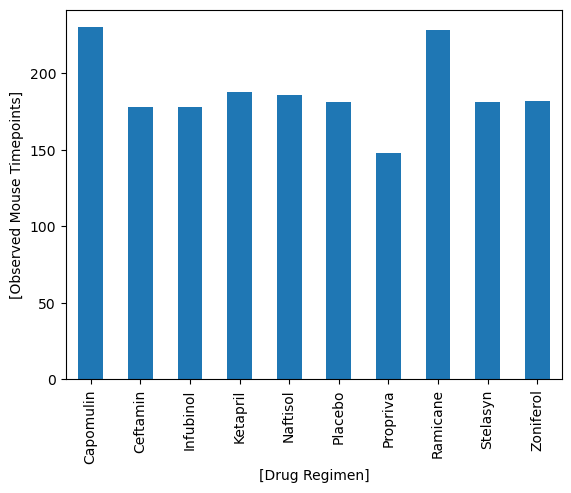

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#groupby_drugreg_df

regimen_count= groupby_drugreg_df["Mouse ID"].count()
regimen_count.plot(kind=("bar"), xlabel= ["Drug Regimen"], ylabel=["Observed Mouse Timepoints"])
#regimen_count.set_xlabel('Drug Regimen')
#regimen_count.set_ylabel('Mouse / Timepoints')

#plot.show()
#plot.tight_layout
                                                            
#regimen_count_df.head()                                                          


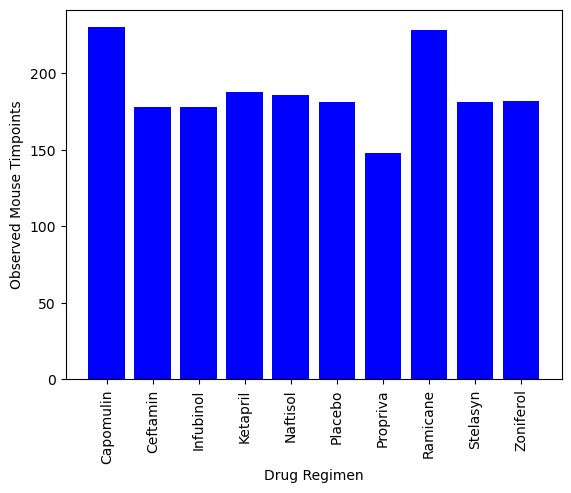

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
py_regimen_count = groupby_drugreg_df["Mouse ID"].count()
plt.bar(py_regimen_count.index,py_regimen_count,color ="b", align= "center")
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse Timpoints')
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='count'>

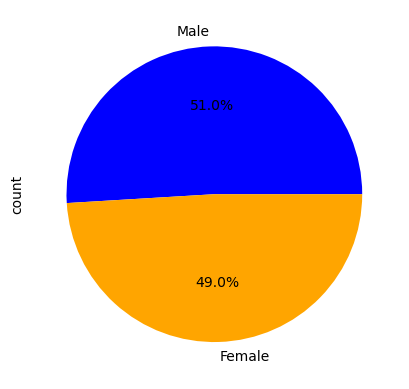

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#groupby_drugreg_df
both_male_female_df = updated_study1_df["Sex"].count()
gen_counts_df = updated_study1_df["Sex"].value_counts()
male_female_df = (gen_counts_df / both_male_female_df) * 100
#print(male_female)
male_female_df.plot(kind=("pie"),y='Sex', autopct ='%.1f%%',
           colors = ['blue', 'orange'])

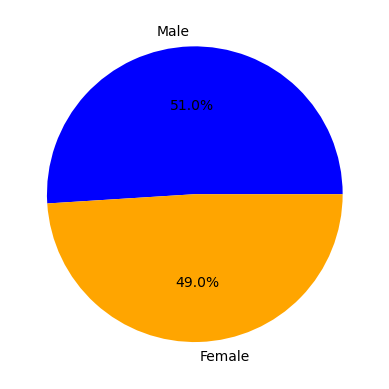

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#male_female = (gen_counts_df / both_male_female_df) * 100
labels = ["Male", "Female"]
colors =['blue', 'orange']
sizes = [51, 49] 
plt.pie(sizes, labels=labels,  autopct="%1.1f%%", colors=colors)
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
#not sure what happen to dataframe - it was not working correctly so made a new dataframe to ensure data was correct for this next part. . 

#drug_name_df = updated_study1_df.groupby(["Drug Regimen"])
#print(drug_name_df )
#drug_name_df.count()



In [16]:
#updated_study1_df["Drug_Regimen"].isin(drug_names)

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
#Capomulin, Ramicane, Infubinol, and Ceftamin

drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
#filtered_df = groupby_drugreg1_df[groupby_drugreg1_df["Drug Regimen"].isin(treatments)]
tx_regimens_df = updated_study1_df[updated_study1_df["Drug Regimen"].isin(drug_names)]
#drugs.head()


# Start by getting the last (greatest) timepoint for each mouse
tumor_max= tx_regimens_df.groupby(["Mouse ID"])['Timepoint'].max()
tumor_max = tumor_max.reset_index()
    

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
combnd_data = tumor_max.merge(tx_regimens_df,on=['Mouse ID','Timepoint'],how="left")
combnd_data.head()



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
#Campomulin _df= updated_study1_df.loc[updated_study1_df["Drug Regimen"] == "Capomulin" ,:]
#Ramicane_df = updated_study1_df.loc[updated_study1_df["Drug Regimen"] == "Ramicane" ,:]
#Infubinol_df = updated_study1_df.loc[updated_study1_df["Drug Regimen"] == "Infubinol" ,:]
#Ceftamin_df = updated_study1_df.loc[updated_study1_df["Drug Regimen"] == "Ceftamin" ,:]

drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_names:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub_data = combnd_data[combnd_data["Drug Regimen"] == drug]
    
    # add subset 
    tumor_vol = sub_data["Tumor Volume (mm3)"]
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = sub_data[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"Results for {drug}:")
    print(f"The lower quartile of {drug} is :{lowerq}")
    print(f"The upper quartile of {drug} is :{upperq}")
    print(f"The interquartile range of {drug} is :{iqr}")
    print(f"Values below{lower_bound} could be {drug} outliers")      
    print(f"Values below{upper_bound} could be {drug} outliers")
    print(f"-----------------------------------------------------")


Results for Capomulin:
The lower quartile of Capomulin is :32.37735684
The upper quartile of Capomulin is :40.1592203
The interquartile range of Capomulin is :7.781863460000004
Values below20.70456164999999 could be Capomulin outliers
Values below51.83201549 could be Capomulin outliers
-----------------------------------------------------
Results for Ramicane:
The lower quartile of Ramicane is :31.56046955
The upper quartile of Ramicane is :40.65900627
The interquartile range of Ramicane is :9.098536719999998
Values below17.912664470000003 could be Ramicane outliers
Values below54.30681135 could be Ramicane outliers
-----------------------------------------------------
Results for Infubinol:
The lower quartile of Infubinol is :54.04860769
The upper quartile of Infubinol is :65.52574285
The interquartile range of Infubinol is :11.477135160000003
Values below36.83290494999999 could be Infubinol outliers
Values below82.74144559000001 could be Infubinol outliers
---------------------------

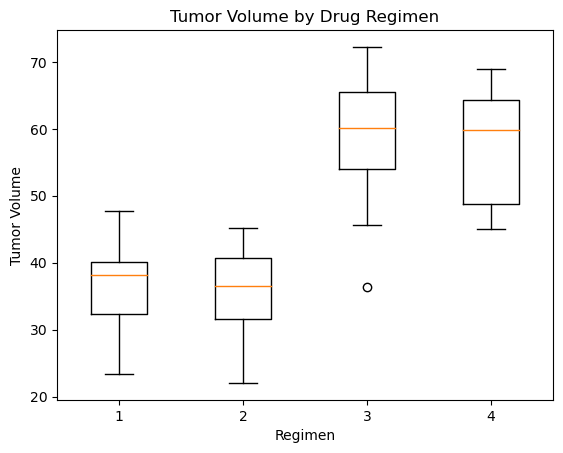

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

boxplot_list = [combnd_data[combnd_data["Drug Regimen"] == drug]["Tumor Volume (mm3)"].dropna().values for drug in drug_names]

fig = plt.figure()
plt.xlabel("Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")

plt.boxplot(boxplot_list)
plt.show()



## Line and Scatter Plots

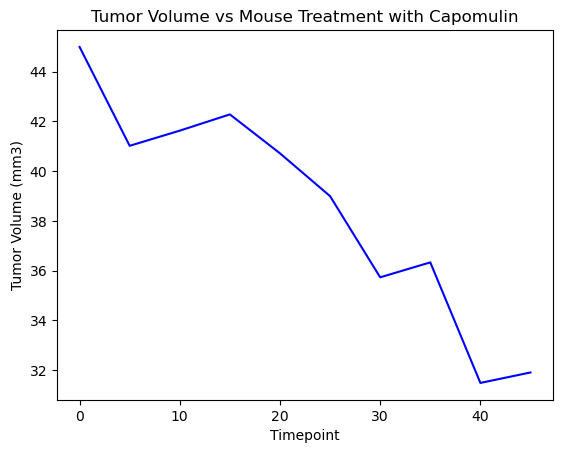

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#single_mouse = combnd_data[["Drug Regimen", "Mouse ID"]]
#print(single_mouse)
#Mouse_id = "y793" 
single_mouse_df = tx_regimens_df.loc[tx_regimens_df["Mouse ID"] == "y793" ,:]
#single_mouse_df.head()


plt.plot(single_mouse_df["Timepoint"], single_mouse_df["Tumor Volume (mm3)"], linestyle='-', color='b')
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')
plt.title (f"Tumor Volume vs Mouse Treatment with Capomulin")

plt.show()

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#campomulin_info = tx_regimens_df.groupby(['Mouse ID']).mean()

#modified_campomulin_info = campomulin_info.copy()
#modified_campomulin_info['Weight (g)'] = pd.to_numeric(modified_campomulin_info['Weight (g)'], errors ='coerce')
#modified_campomulin_info['Tumor Volume (mm3'] = pd.to_numeric(modified_campomulin_info['Tumor Volume (mm3'], errors='coerce')
#modified_campomulin_info = modified_campomulin_info.dropna()
#modified_campomulin_info.head()

#plt.scatter(modified_campomulin_info['Weight (g)'],modified_campomulin_info['Tumor Volume (mm3)'], color='blue')
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Volume(mm3)')
#plt.title('Mouse Weight vs Average Observed Tumor Volume')
#plt.show()
import re


campomulin_info = tx_regimens_df.groupby(['Mouse ID']).mean()


def clean_numeric_columns(col):
    col = col.apply(lambda x: re.sub(r'[^0-9.]', '', str(x))) 
    col = pd.to_numeric(col, errors='coerce')  
    return col


campomulin_info['Weight (g)'] = clean_numeric_columns(campomulin_info['Weight (g)'])
campomulin_info['Tumor Volume (mm3)'] = clean_numeric_columns(campomulin_info['Tumor Volume (mm3)'])


campomulin_info.dropna(subset=['Weight (g)', 'Tumor Volume (mm3)'], inplace=True)
t
plt.scatter(campomulin_info['Weight (g)'], campomulin_info['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Relationship between Weight and Average Tumor Volume')
plt.show()


TypeError: Could not convert InfubinolInfubinolInfubinolInfubinolInfubinolInfubinolInfubinolInfubinolInfubinolInfubinol to numeric

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation=round(st.pearsonr(modified_campomulin_info['Weight (g)'],modified_campomulin_info['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

NameError: name 'modified_campomulin_info' is not defined